## Sharks_Part2_Florida

In [4]:
ls

DIARY.md              GSAF5.xls             Sharks_Florida.ipynb


In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [11]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [8]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [12]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,...,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,...,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN
2,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,...,NaN,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6103.0,NaN,NaN
3,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,...,NaN,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6102.0,NaN,NaN
4,2017.06.29.R,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,...,NaN,"TriStateHomePage, 6/29/2017",2017.06.29.R-Wallhauser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29.R,2017.06.29.R,6101.0,NaN,NaN


In [21]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [24]:
sharks['Area'].value_counts()

Florida                            1017
New South Wales                     476
Queensland                          307
Hawaii                              288
California                          281
KwaZulu-Natal                       212
Western Cape Province               191
Western Australia                   178
Eastern Cape Province               158
South Carolina                      153
South Australia                     103
North Carolina                      100
Victoria                             84
Texas                                71
Pernambuco                           71
Torres Strait                        70
North Island                         65
New Jersey                           49
Tasmania                             41
South Island                         40
Oregon                               29
New York                             27
Northern Territory                   23
Central Province                     22
Abaco Islands                        22


In [71]:
sharks['Area'].value_counts()

Florida                                                1005
New South Wales                                         469
Queensland                                              303
California                                              280
Hawaii                                                  279
KwaZulu-Natal                                           210
Western Cape Province                                   190
Western Australia                                       175
Eastern Cape Province                                   158
South Carolina                                          148
South Australia                                         102
North Carolina                                           99
Victoria                                                 83
Texas                                                    70
Pernambuco                                               70
North Island                                             65
Torres Strait                           

In [72]:
sharks['Location'].value_counts()

New Smyrna Beach, Volusia County                                        162
Daytona Beach, Volusia County                                            29
Ponce Inlet, Volusia County                                              18
Melbourne Beach, Brevard County                                          18
Myrtle Beach, Horry County                                               17
Durban                                                                   15
Isle of Palms, Charleston County                                         14
Boa Viagem, Recife                                                       13
Ponce Inlet, New Smyrna Beach, Volusia County                            12
Cocoa Beach, Brevard County                                              12
Ormond Beach, Volusia County                                             11
Palm Beach, Palm Beach County                                            11
Ahvaz, on the Karun River                                                11
Mossel Bay  

In [27]:
#sharks.dropna(subset=["Area"], inplace=True)

In [69]:
#sharks.dropna(subset=["Location"], inplace=True)

In [73]:
sharks['Area']

0                                 Florida
1                   Eastern Cape Province
2                                 Anjouan
3                          South Carolina
4                          South Carolina
5                                 Florida
6                          South Carolina
8                            Ibiza Island
10                      Western Australia
11                               Victoria
12                                Florida
13                            South Devon
14                                Florida
15                        New Providence 
16                         South Carolina
17                                Florida
18                        New South Wales
19                              Sharjah, 
20                             Queensland
21                    Baja California Sur
22                             California
23                             California
24                  Western Cape Province
25                         South C

In [83]:
sharks_Florida = sharks[sharks["Area"] == "Florida"]

In [84]:
sharks_Florida

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'"
5,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN
12,10-Jun-2017,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,NaN
14,04-Jun-2017,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,NaN,Laceration to shin,N,NaN,8' shark
17,28-May-2017,2017.0,Unprovoked,USA,Florida,Off Jupiter,Feeding sharks,Randy Jordan,M,NaN,Lacerations to right arm,N,Morning,Tiger shark
31,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN
34,13-Apr-2017,2017.0,Unprovoked,USA,Florida,"Hanna Park, Jacksonville, Duval County",Surfing,Keeanan Perry,M,17,Lacerations to right foot,N,13h30,NaN
35,12-Apr-2017,2017.0,Unprovoked,USA,Florida,St. Augustine,Surfing,Kerry Keyton,F,NaN,Lacerations to right foot,N,13h45,NaN
37,11-Apr-2017,2017.0,Unprovoked,USA,Florida,"Ormond Beach, Volusia County",Surfing,Denise Holz-Oosterveld,F,35,Calf bitten,N,16h00,NaN
38,10-Apr-2017,2017.0,Unprovoked,USA,Florida,"Melbourne Beach, Brevard County",Paddle boarding,female,F,10,Laceration to calf,N,17h45,NaN


In [75]:
sharks_Florida['Location'].value_counts() #= sharks[(sharks["Year"]>1970) & (attack["Year"]<2017)]

New Smyrna Beach, Volusia County                                  162
Daytona Beach, Volusia County                                      29
Ponce Inlet, Volusia County                                        18
Melbourne Beach, Brevard County                                    18
Ponce Inlet, New Smyrna Beach, Volusia County                      12
Cocoa Beach, Brevard County                                        12
Ormond Beach, Volusia County                                       11
Palm Beach, Palm Beach County                                      11
Singer Island, Riviera Beach, Palm Beach County                    10
Cocoa Beach, Brevard  County                                       10
Florida Keys, Monroe County                                         9
Jacksonville Beach, Duval County                                    9
Florida Keys                                                        8
Vero Beach, Indian River County                                     8
Sanibel Island, Lee 

In [79]:
sharks_Florida_neu = sharks_Florida[sharks_Florida['Location']>'5']

In [77]:
#sharks_Florida_neu.dropna(subset=["Location"], inplace=True)

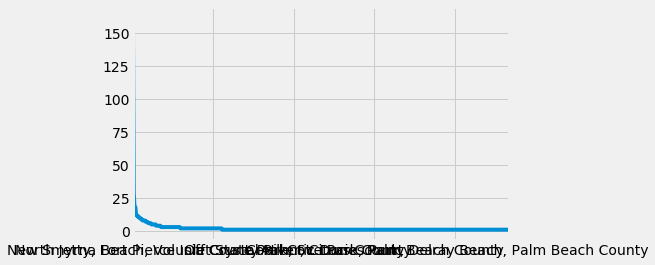

In [88]:
sharks_Florida_neu['Location'].value_counts().plot()